In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Muestra todas las columnas de un DataFrame
sns.set(style="whitegrid", palette="viridis") # Define un estilo de graficos

# Carga de dataset
df = pd.read_csv("../data/raw/spain_energy.csv")

# Vista de las primeras 5 filas
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [12]:
# Renombra columnas del DataFrame
df.rename(columns={
    'datetime': 'fecha_hora',
    'id': 'id_registro',
    'name': 'nombre_variable',
    'geoid': 'id_geografico',
    'geoname': 'nombre_region',
    'value': 'precio_energia'
}, inplace=True)

df.head()

,fecha_hora,id_registro,nombre_variable,id_geografico,nombre_region,precio_energia
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [13]:
# Deteccion de valores nulos
df.isnull().sum()

fecha_hora             0
id_registro            0
nombre_variable     5478
id_geografico      29256
nombre_region      29256
precio_energia         0
dtype: int64

In [14]:
df['nombre_variable'].unique()

array(['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA',
       'Precio mercado SPOT Diario POR',
       'Energía asignada en Mercado SPOT Diario España',
       'Energía asignada en Mercado SPOT Diario Francia', nan,
       'Rentas de congestión mecanismos implícitos diario Francia exportación',
       'Rentas de congestión mecanismos implícitos diario Portugal exportación',
       'Rentas de congestión mecanismos implícitos diario Francia importación',
       'Rentas de congestión mecanismos implícitos diario Portugal importación',
       'Demanda real', 'Demanda programada PBF total',
       'Generación programada PBF total',
       'Generación programada PBF Eólica',
       'Generación programada PBF Ciclo combinado',
       'Generación programada PBF Carbón',
       'Generación programada PBF Nuclear',
       'Generación programada PBF Gas Natural Cogeneración',
       'Generación programada PBF UGH + no UGH',
       'Generación programada PBF Solar fotovoltaica'

In [15]:
df['id_geografico'].unique()

array([ 3.,  2.,  1., nan])

In [16]:
df['nombre_region'].unique()

array(['España', 'Francia', 'Portugal', nan], dtype=object)

In [ ]:
# Definimos una funcion para inferir el nombre de un pais
def inferir_region(row):
    nombre = str(row['nombre_variable']).upper()
    if 'ESP' in nombre:
        return 'España'
    elif 'FRA' in nombre:
        return 'Francia'
    elif 'POR' in nombre:
        return 'Portugal'
    else:
        return row['nombre_region']

# Aplicamos la funcion a cada fila
df['nombre_region'] = df.apply(inferir_region, axis=1)

In [ ]:
# Creamos un diccionario que aoscia en nombre de cada pais con un identificador numerico.
mapa_ids = {'España': 3.0, 'Francia': 1.0, 'Portugal': 2.0}
# Usamos metodo .map() para reemplaar los nombre de regios por sus IDs
df['id_geografico'] = df['nombre_region'].map(mapa_ids)


In [30]:
df.isnull().sum()

fecha_hora             0
id_registro            0
nombre_variable     5478
id_geografico      20043
nombre_region      20043
precio_energia         0
tipo_registro          0
dtype: int64

In [ ]:
# Hace un calculo del promedio de valores nulos
df.isnull().mean() * 100


fecha_hora          0.000000
id_registro         0.000000
nombre_variable    13.622799
id_geografico      49.843330
nombre_region      49.843330
precio_energia      0.000000
tipo_registro       0.000000
dtype: float64

In [ ]:
# Muestra las 5 primeras filas con valores nulos
df[df['nombre_variable'].isnull()].head()


,fecha_hora,id_registro,nombre_variable,id_geografico,nombre_region,precio_energia,tipo_registro
9130,2014-01-01 23:00:00,600,NaN,2.0,Portugal,25.043750,Regional
9131,2014-01-01 23:00:00,600,NaN,1.0,Francia,28.711250,Regional
9132,2014-01-01 23:00:00,600,NaN,3.0,España,25.280833,Regional
9133,2014-01-02 23:00:00,600,NaN,2.0,Portugal,38.980417,Regional
9134,2014-01-02 23:00:00,600,NaN,1.0,Francia,28.397500,Regional


In [ ]:
# Muestra el porcentaje de frecuencia de cada categoria
df['tipo_registro'].value_counts(normalize=True) * 100


tipo_registro
Nacional                    49.843330
Regional                    31.786531
Internacional - Francia     10.337710
Internacional - Portugal     8.032428
Name: proportion, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16548\364834628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['tipo_registro'].value_counts().index,


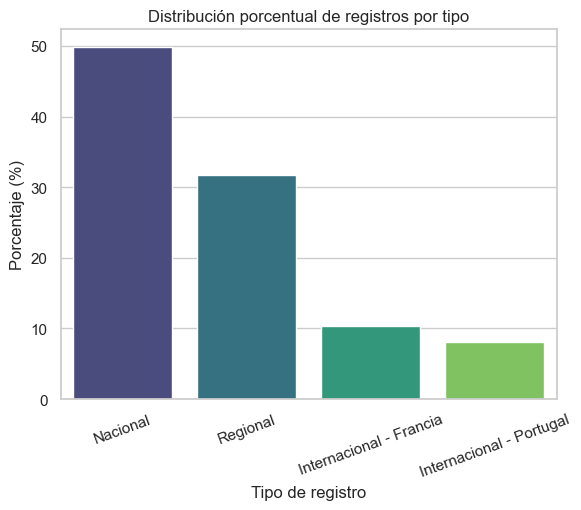

In [34]:


# Gráfico de barras de proporciones por tipo de registro
sns.barplot(x=df['tipo_registro'].value_counts().index,
            y=df['tipo_registro'].value_counts(normalize=True) * 100,
            palette='viridis')

plt.title('Distribución porcentual de registros por tipo')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de registro')
plt.xticks(rotation=20)
plt.show()


In [35]:
pd.crosstab(df['nombre_region'], df['nombre_variable'])


nombre_variable,Energía asignada en Mercado SPOT Diario España,Energía asignada en Mercado SPOT Diario Francia,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Rentas de congestión mecanismos implícitos diario Francia exportación,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal exportación,Rentas de congestión mecanismos implícitos diario Portugal importación
nombre_region,,,,,,,,,
España,1826,0,1826,0,0,0,0,0,0
Francia,0,1826,0,1826,0,712,1619,0,0
Portugal,0,0,0,0,1826,0,0,1566,1664


| País / Variable | Energía asignada                                  | Precio SPOT | Rentas de congestión                                                    |
| --------------- | ------------------------------------------------- | ----------- | ----------------------------------------------------------------------- |
| **España**      | 1.826 registros de energía y 1.826 de precio SPOT |             | Ninguna renta de congestión                                             |
| **Francia**     | 1.826 registros de energía y 1.826 de precio SPOT |             | Rentas de congestión Francia exportación (712) + importación (1.619)    |
| **Portugal**    | 1.826 registros de precio SPOT                    |             | Rentas de congestión Portugal exportación (1.566) + importación (1.664) |


In [29]:
df['fecha_hora'].min(), df['fecha_hora'].max()


('2014-01-01 23:00:00', '2018-12-31 23:00:00')

In [30]:
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])
df.sort_values(by='fecha_hora', inplace=True)
df.set_index('fecha_hora', inplace=True)

In [31]:
df.index.min(), df.index.max()


(Timestamp('2014-01-01 23:00:00'), Timestamp('2018-12-31 23:00:00'))

In [32]:
precios = df[df['nombre_variable'].str.contains('Precio mercado SPOT Diario')]
precios.head()

,id_registro,nombre_variable,id_geografico,nombre_region,precio_energia
fecha_hora,,,,,
2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
2014-01-01 23:00:00,600,Precio mercado SPOT Diario POR,2.0,Portugal,25.043750
2014-01-01 23:00:00,600,Precio mercado SPOT Diario FRA,1.0,Francia,28.711250
2014-01-02 23:00:00,600,Precio mercado SPOT Diario FRA,1.0,Francia,28.397500
2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167


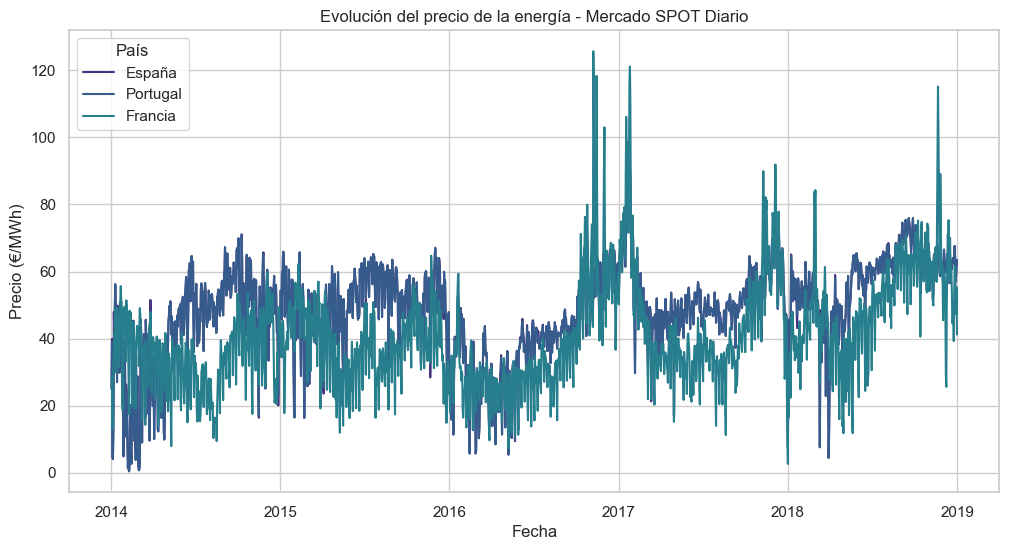

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(data=precios, x=precios.index, y='precio_energia', hue='nombre_region')
plt.title('Evolución del precio de la energía - Mercado SPOT Diario')
plt.xlabel('Fecha')
plt.ylabel('Precio (€/MWh)')
plt.legend(title='País')
plt.show()


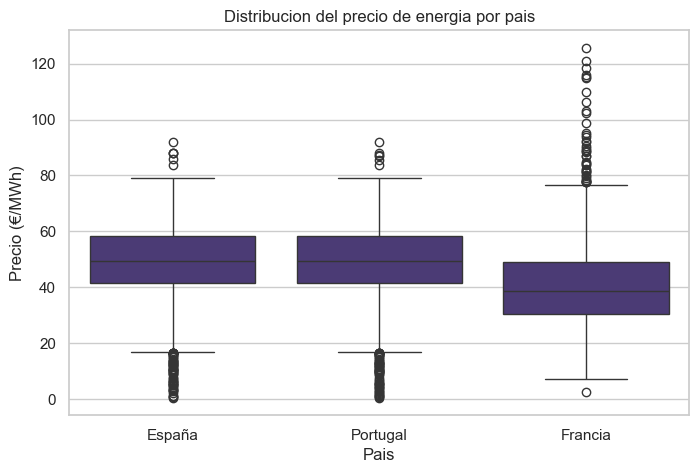

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=precios, x='nombre_region', y='precio_energia')
plt.title('Distribucion del precio de energia por pais')
plt.xlabel('Pais')
plt.ylabel('Precio (€/MWh)')
plt.show()

In [ ]:
# Agrupa los datos, selecciona, calcula estadisticas y redondea los resultados a 2 decimales
precios.groupby('nombre_region')['precio_energia'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
nombre_region,,,,,,,,
España,1826.0,48.36,13.76,0.48,41.57,49.47,58.17,91.88
Francia,1826.0,41.02,15.46,2.66,30.60,38.80,49.10,125.67
Portugal,1826.0,48.35,13.81,0.48,41.58,49.47,58.28,91.91


In [ ]:
# Reestructura los datos y calcula la variacion porcentual entre registros
df_var = precios.pivot_table(values='precio_energia', index=precios.index, columns='nombre_region')
df_var = df_var.pct_change() * 100
df_var.describe().round(2)


nombre_region,España,Francia,Portugal
count,1825.00,1825.00,1825.00
mean,4.49,4.00,4.29
std,42.43,40.44,42.22
min,-87.50,-75.66,-87.98
25%,-6.92,-11.56,-6.84
50%,-0.30,-2.06,-0.18
75%,6.89,9.37,6.95
max,566.09,1111.66,674.08


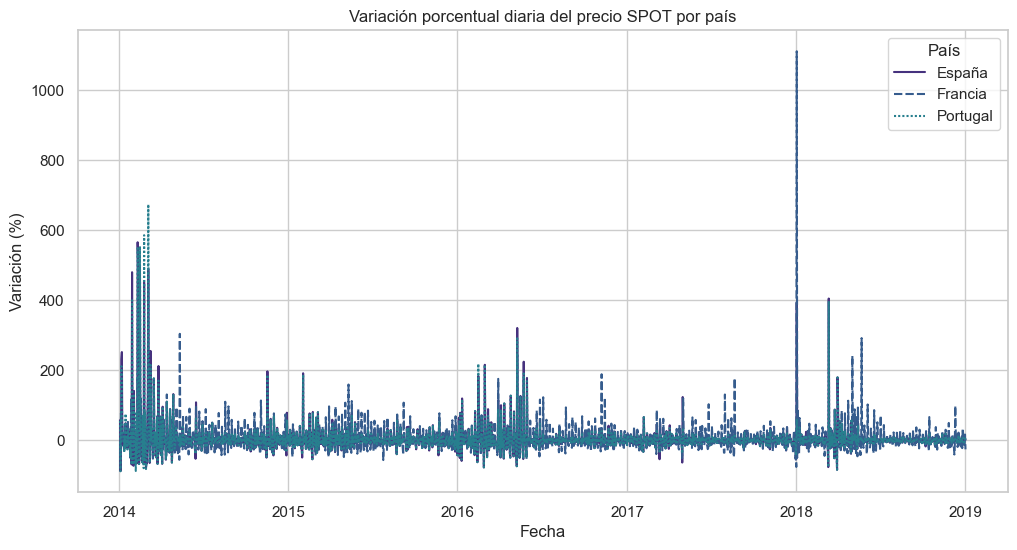

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_var)
plt.title('Variación porcentual diaria del precio SPOT por país')
plt.ylabel('Variación (%)')
plt.xlabel('Fecha')
plt.legend(title='País')
plt.show()


In [39]:
thresholds = precios.groupby('nombre_region')['precio_energia'].transform(
    lambda x: (x - x.mean()) / x.std()
)
anomalos = precios[abs(thresholds) > 2]
anomalos.sort_values('fecha_hora').head()


,id_registro,nombre_variable,id_geografico,nombre_region,precio_energia
fecha_hora,,,,,
2014-01-03 23:00:00,600,Precio mercado SPOT Diario POR,2.0,Portugal,4.683750
2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
2014-01-04 23:00:00,600,Precio mercado SPOT Diario POR,2.0,Portugal,4.091667
2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
2014-01-05 23:00:00,600,Precio mercado SPOT Diario POR,2.0,Portugal,12.762500


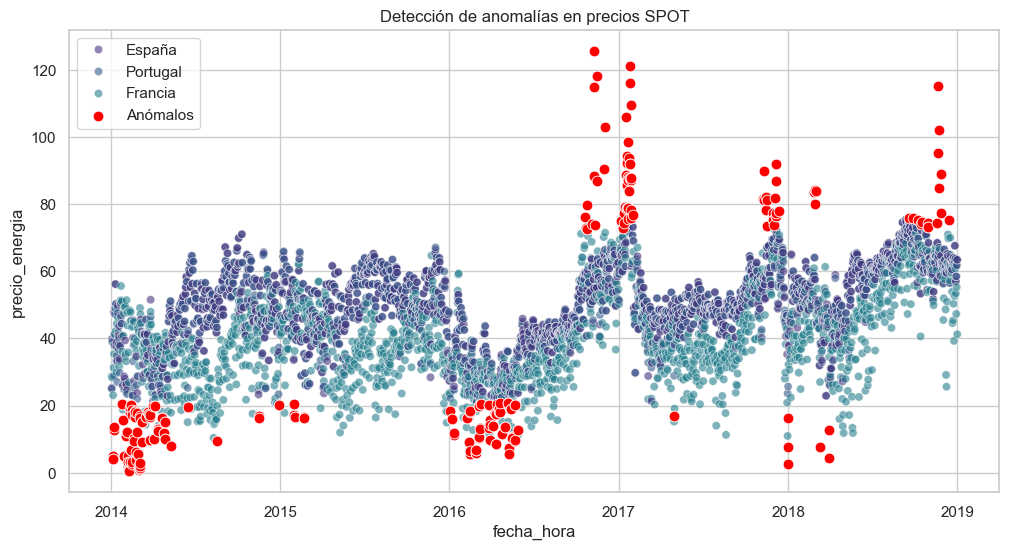

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=precios, x='fecha_hora', y='precio_energia', hue='nombre_region', alpha=0.6)
sns.scatterplot(data=anomalos, x='fecha_hora', y='precio_energia', color='red', label='Anómalos', s=60)
plt.title('Detección de anomalías en precios SPOT')
plt.legend()
plt.show()
